In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [1]:
import  numpy as np
import pandas as pd 
import matplotlib as plt
import os 
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import cv2


In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (64, 64))  # Resize to a fixed size
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                    images.append(img)
                    labels.append(subfolder)  # Assume subfolder name is the label
    return np.array(images), np.array(labels)

data_dir = "/kaggle/input/cat-and-dog/training_set/training_set"  # Update with your dataset path
images, labels = load_images_from_folder(data_dir)

In [44]:
labels

array(['dogs', 'dogs', 'dogs', ..., 'cats', 'cats', 'cats'], dtype='<U4')

In [3]:
# Reshape the images for Conv2D (add channel dimension for grayscale)
images = images.reshape(-1, 64, 64, 1)  # Shape should be (num_samples, 64, 64, 1) for grayscale


In [4]:
le = LabelEncoder()
labels = le.fit_transform(labels)  # Encode 'dog' and 'cat' as 0 and 1

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,pred))

Accurecy:  0.6127420362273579


In [10]:
xg=XGBClassifier()
xg.fit(X_train,y_train)
pred=xg.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,pred))

Accurecy:  0.6352279825109307


In [6]:
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 



Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7c4568dcfe20>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7c4568dcfe20>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [27]:
model = Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())  # Flatten before passing to Dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 700928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    44,859,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,863,105 (171.14 MB)

 Trainable params: 44,863,105 (171.14 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_3" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 64, 64, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 64, 64, 1), dtype=uint8)
  • training=True
  • mask=None

In [7]:

# Reshape the images for Conv2D (add channel dimension for grayscale)
images = images.reshape(-1, 64, 64, 1)  # Shape should be (num_samples, 64, 64, 1) for grayscale

# Encode labels ('dog', 'cat' to 0, 1)
le = LabelEncoder()
labels = le.fit_transform(labels)  # Encode 'dog' and 'cat' as 0 and 1

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 1)))  # Adjust input shape
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())  # Flatten before passing to Dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Fixed typo

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,872,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,873,921 (30.04 MB)

 Trainable params: 7,873,921 (30.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1726861761.690800     112 service.cc:145] XLA service 0x7c43c000b280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726861761.690859     112 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726861761.690864     112 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 22/201 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4889 - loss: 212.8376

I0000 00:00:1726861764.067627     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4982 - loss: 46.4255 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4956 - loss: 0.6932 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5028 - loss: 0.6931 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5086 - loss: 0.6931 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4951 - loss: 0.6932 - val_accuracy: 0.4878 - va

In [9]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential, layers

def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (64, 64))  # Resize to 64x64
                    # Keep the image in RGB format, do not convert to grayscale
                    images.append(img)
                    labels.append(subfolder)  # Assume subfolder name is the label
    return np.array(images), np.array(labels)

# Path to dataset
data_dir = "/kaggle/input/cat-and-dog/training_set/training_set"  # Update with your dataset path

# Load images and labels
images, labels = load_images_from_folder(data_dir)

# Reshape the images for Conv2D (RGB has 3 channels)
images = images.reshape(-1, 64, 64, 3)  # Shape (num_samples, 64, 64, 3) for RGB

# Encode labels ('dog', 'cat' to 0, 1)
le = LabelEncoder()
labels = le.fit_transform(labels)  # Encode 'dog' and 'cat' as 0 and 1

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 512)    │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 62, 62, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 31, 31, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 29, 29, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,674,049 (10.20 MB)

 Trainable params: 2,671,745 (10.19 MB)

 Non-trainable params: 2,304 (9.00 KB)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.5776 - loss: 0.9169 - val_accuracy: 0.6259 - val_loss: 0.7175
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.6772 - loss: 0.6253 - val_accuracy: 0.6827 - val_loss: 0.5830
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.7169 - loss: 0.5511 - val_accuracy: 0.5984 - val_loss: 0.7753
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.7707 - loss: 0.4701 - val_accuracy: 0.7152 - val_loss: 0.5449
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.7927 - loss: 0.4358 - val_accuracy: 0.4922 - val_loss: 1.7445
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.7856 - loss: 0.4527 - val_accuracy: 0.7027 - val_loss: 0.5780
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8152 - loss: 0.3947 - val_accuracy: 0.7102 - val_loss: 0.5884
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8487 - loss: 0.3358 - 

In [68]:

# Build the model
model = Sequential()

# First Convolutional Block
model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())  # Normalizes the input to this layer
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout to prevent overfitting

# Second Convolutional Block
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flatten before passing to Dense layers
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # More dropout for regularization

# Output Layer (for binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 62, 62, 512)    │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 62, 62, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 31, 31, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 31, 31, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 29, 29, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 29, 29, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,714,241 (10.35 MB)

 Trainable params: 2,712,321 (10.35 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إنشاء المسار لحفظ النموذج بأعلى دقة تحقق
checkpoint_filepath = 'final.h5'  # تحديث الامتداد إلى .keras

# إنشاء ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    checkpoint_filepath,  # المسار الذي سيحفظ النموذج فيه
    monitor='val_accuracy',  # المقياس الذي نريد مراقبته
    save_best_only=True,  # حفظ النموذج فقط عندما تكون دقة التحقق أعلى من أي وقت مضى
    mode='max',  # نريد أعلى قيمة ممكنة لدقة التحقق
    verbose=1  # عرض رسالة عند حفظ النموذج
)


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# استخدم هذا في fit_generator بدلاً من fit
history_kk = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint])


# لاحقاً، يمكنك تحميل النموذج الأفضل كما يلي:
from tensorflow.keras.models import load_model
best_model = load_model(checkpoint_filepath)

# الآن يمكنك استخدام `best_model` لإجراء التوقعات.



In [56]:
# تحميل بيانات مجموعة الاختبار
test_dir = "/kaggle/input/cat-and-dog/test_set/test_set"  # تحديث المسار حسب مسار بيانات الاختبار
test_images, test_labels = load_images_from_folder(test_dir)
test_images = test_images.reshape(-1, 64, 64, 3)
test_labels = le.transform(test_labels)  # تحويل التسميات إلى 0 و 1

# التنبؤ باستخدام النموذج المدرب
predictions = best_model.predict(test_images)

# تحويل الاحتماليات إلى تصنيفات ثنائية (0 = cat, 1 = dog)
predicted_classes = (predictions > 0.5).astype("int32")


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
الصورة: dogs | الفئة الفعلية: Dog | الفئة المتوقعة: Dog
الصورة: cats | الفئة الفعلية: Dog | الفئة المتوقعة: Dog


In [70]:
print(classification_report(test_labels,predicted_classes))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1011
           1       0.91      0.92      0.91      1012

    accuracy                           0.91      2023
   macro avg       0.91      0.91      0.91      2023
weighted avg       0.91      0.91      0.91      2023



In [58]:
model.save('final.h5')  # Save your model as .h5


In [64]:
predicted_classes

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [62]:
confusion_matrix(test_labels,predicted_classes)

array([[921,  90],
       [ 84, 928]])

In [52]:
model_path='/kaggle/working/best_model.h5'
model=load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
الصورة المتوقعة هي: Cat


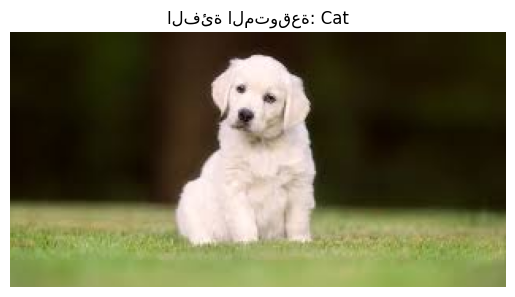

In [67]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# تحميل النموذج المدرب
#model_path = 'path/to/your/trained_model.h5'  # قم بتحديث المسار
#model = load_model(model_path)
model=load_model('/kaggle/working/final_model.h5')
# دالة لتحميل ومعالجة الصورة
def prepare_image(img_path, img_size=(64, 64)):
    # قراءة الصورة
    img = cv2.imread(img_path)
    if img is not None:
        # تغيير الحجم إلى الحجم المطلوب (64x64)
        img = cv2.resize(img, img_size)
        # تحويل الصورة من BGR إلى RGB (لأن OpenCV يستخدم BGR افتراضياً)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # تحويل الصورة إلى مصفوفة numpy وإعادة تشكيلها للشكل المطلوب (1, 64, 64, 3)
        img = np.expand_dims(img, axis=0)
        return img
    else:
        print(f"لم يتم العثور على الصورة في المسار {img_path}")
        return None

# مسار الصورة التي ترغب في التنبؤ بها
image_path = '/kaggle/input/dogsssss/images.jpeg'  # قم بتحديث المسار إلى صورة القطة أو الكلب التي ترغب في التنبؤ بها

# تحضير الصورة للتنبؤ
image = prepare_image(image_path)

# التنبؤ بالفئة إذا كانت الصورة موجودة وتم تحميلها بنجاح
if image is not None:
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]  # الحصول على الفئة المتوقعة
    class_labels = {0: 'Cat', 1: 'Dog'}  # يجب أن تتوافق التسميات مع ما تم استخدامه في التدريب
    predicted_label = class_labels[predicted_class]

    # عرض النتيجة
    print(f"الصورة المتوقعة هي: {predicted_label}")

    # عرض الصورة باستخدام matplotlib
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"الفئة المتوقعة: {predicted_label}")
    plt.axis('off')
    plt.show()
else:
    print("تأكد من مسار الصورة وحاول مرة أخرى.")
